In [2]:
import seaborn as sns
print(sns.__version__)

0.13.2


In [3]:
import seaborn as sns
# Loading "tips" dataset in "tips" 
tips = sns.load_dataset('tips')
# Printing info of the dataset
print(tips.info())
print("\n")
# Printing head of the dataset
print(tips.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


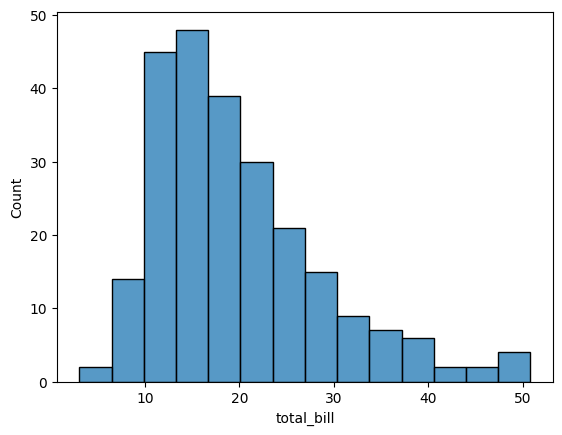

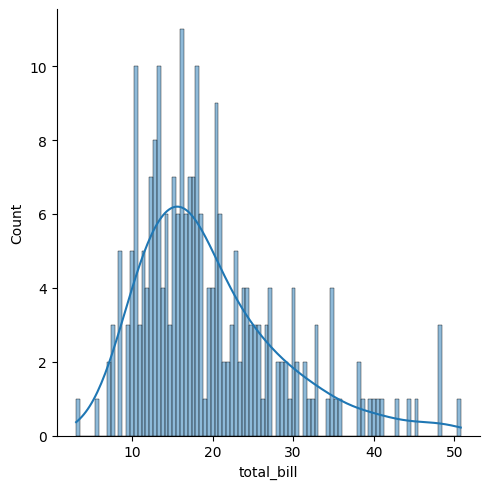

In [4]:

# let’s check how the total bill are distributed in the dataset
sns.histplot(tips['total_bill'])
sns.displot(tips['total_bill'], kde=True, bins=100)


<Axes: xlabel='size', ylabel='Count'>

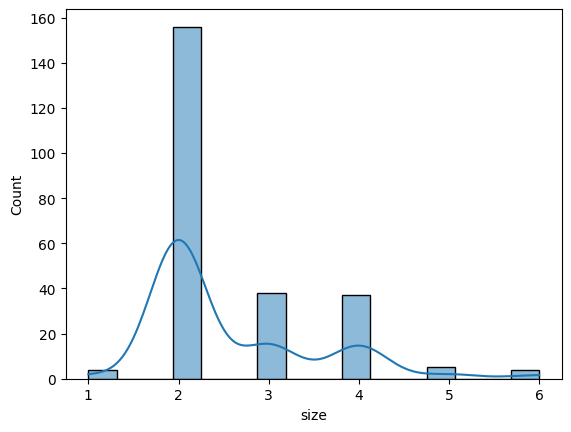

In [5]:
sns.histplot(tips['size'],kde=True)


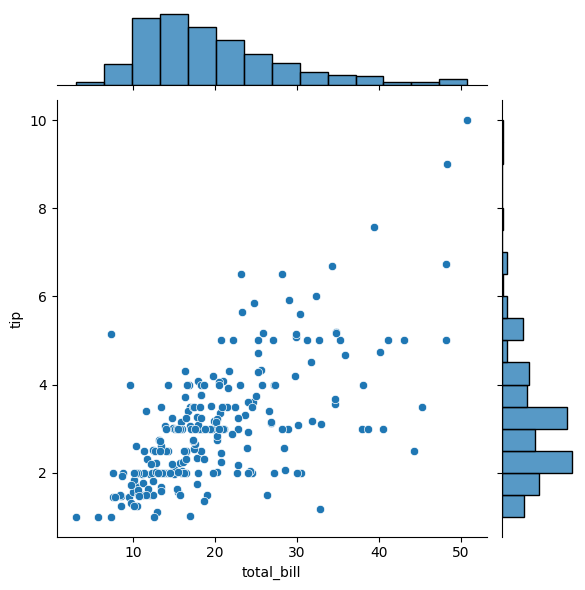

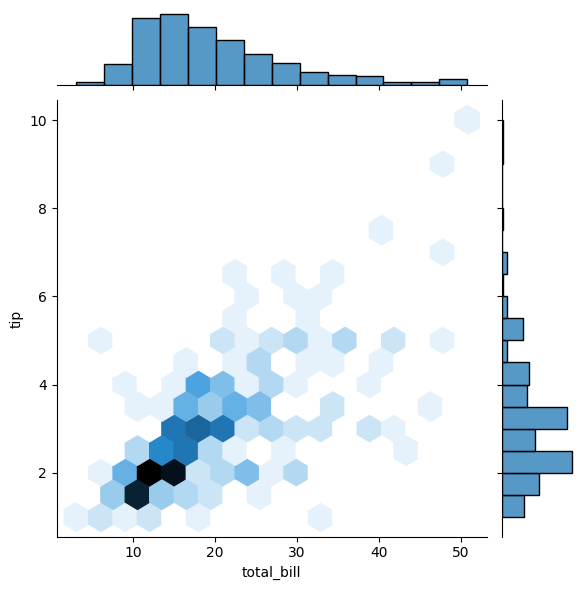

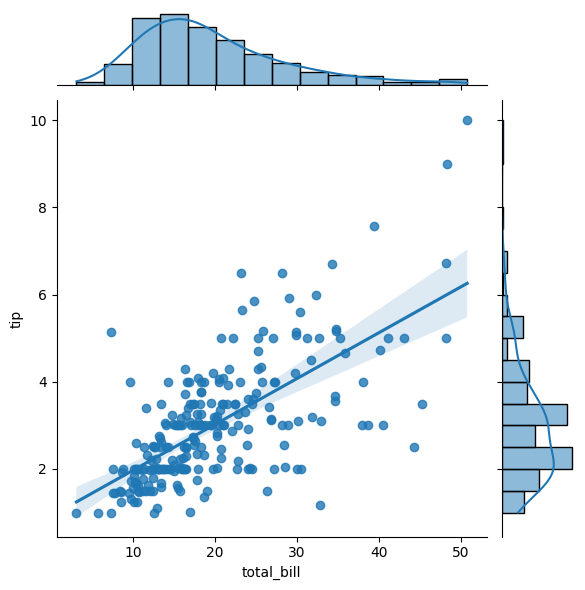

In [6]:
sns.jointplot(x='total_bill',y='tip',data=tips) #kind='scatter' - default
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex')
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg')


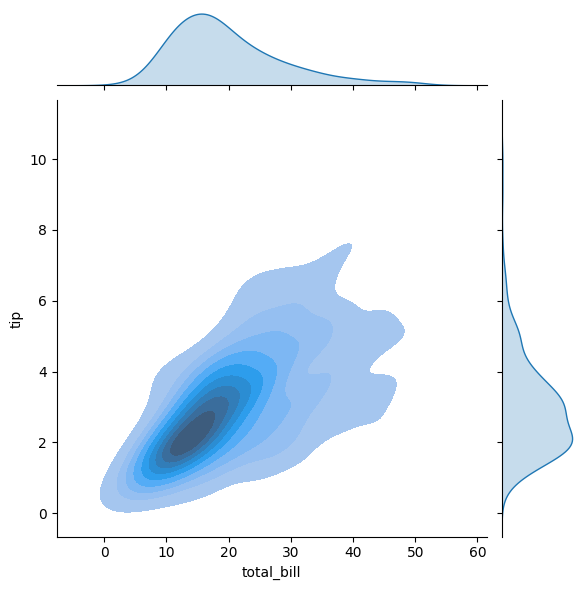

In [7]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde', fill=True)

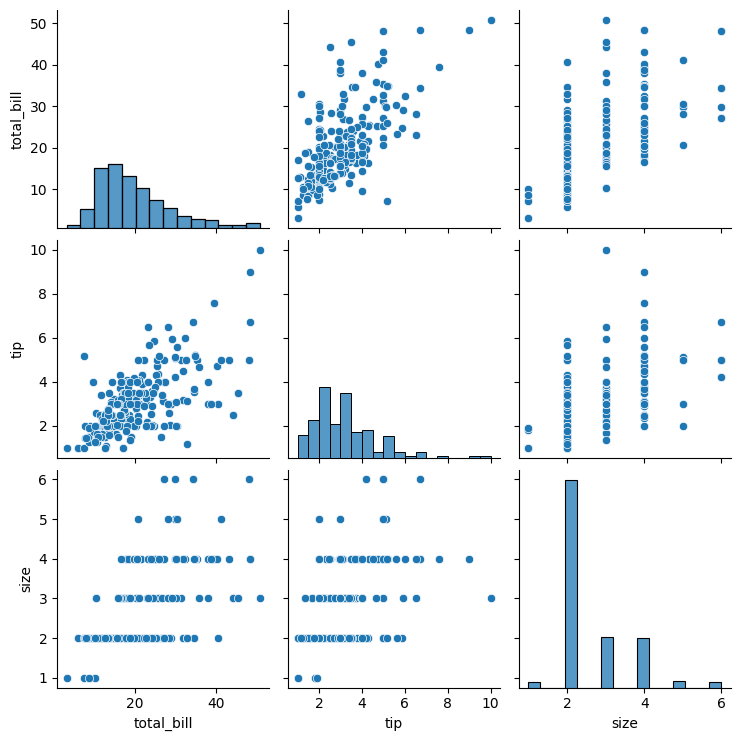

In [8]:
# Let's pass the entire data here
sns.pairplot(tips) # a one line of code, amazing!

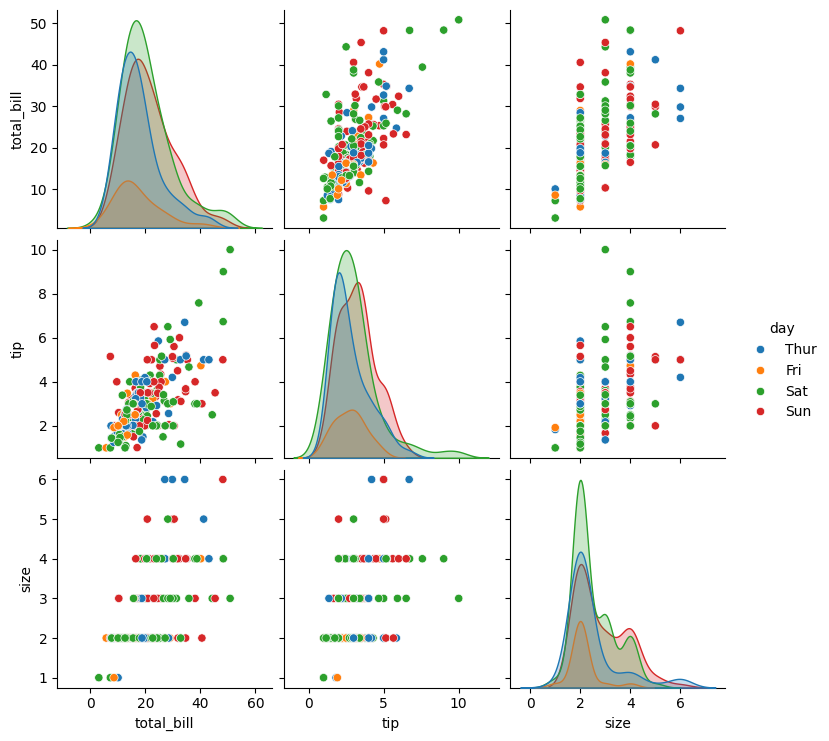

In [9]:
sns.pairplot(tips, hue='day') 

<Axes: xlabel='total_bill'>

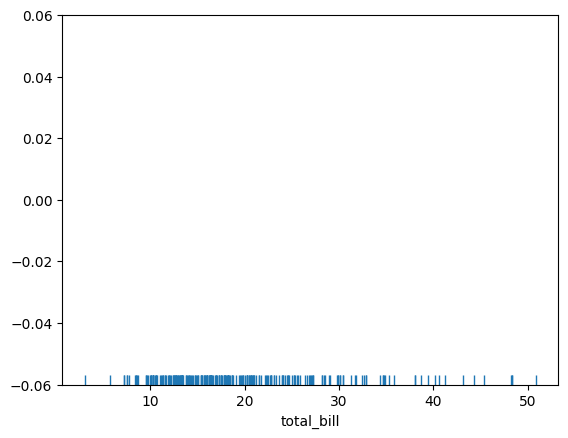

In [10]:
# Let's pass a single col total_bill to the rugplot
sns.rugplot(tips['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

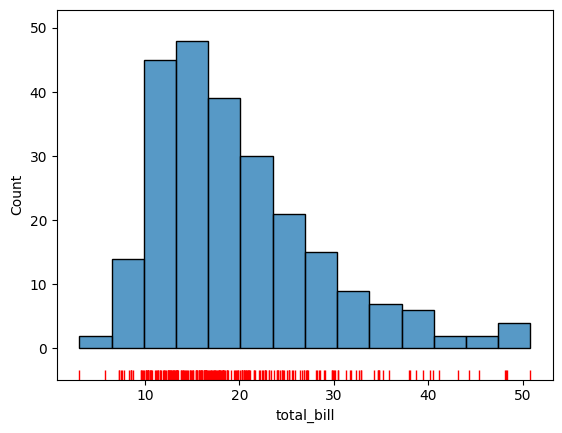

In [11]:
sns.rugplot(tips['total_bill'], color='r') # rugplot
sns.histplot(tips['total_bill'], kde=False) # distplot

/tmp/ipykernel_5328/1051539174.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'])


<Axes: xlabel='total_bill', ylabel='Density'>

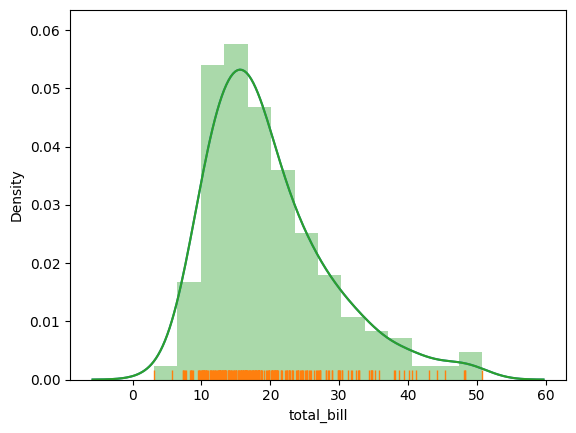

In [12]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])
sns.distplot(tips['total_bill'])

(0.0, 1.0)

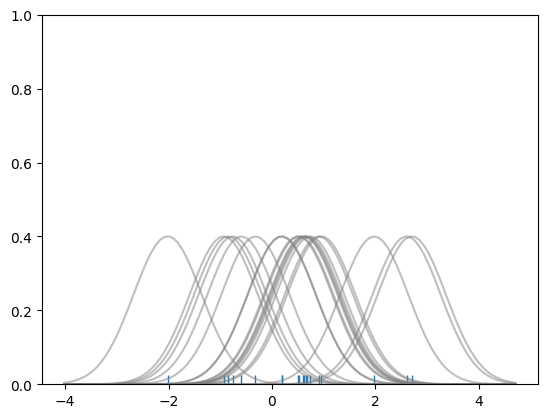

In [16]:
# Step 1: Importing couple of libraries to use 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Creating dataset to use
# setting seed to generate same random numbers every time you run the code, if you use a different 
# number in seed(), you may get a different kde plot at the end. TRY CHANGING THE NUMBER IN THE SEED!
np.random.seed(101)

# data is the dataset from random.randn (recall numpy here!)
dataset = np.random.randn(20)

# Creating rugplot using dataset
sns.rugplot(dataset);

# Setting up the x-axis for the plot using max and min values in the dataset
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# creating 100 equally spaced points from x_min to x_max using np.linspace()
x_axis = np.linspace(x_min,x_max,100)

# Setting up the bandwidth
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Creating an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis) #shift+tab if you want to know more about the function! 
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)